## Test agency historic budget data

In [2]:
pip install awswrangler

  Using cached awswrangler-3.9.0-py3-none-any.whl.metadata (17 kB)
Using cached awswrangler-3.9.0-py3-none-any.whl (381 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
!{sys.executable} -m pip install PyAthena

  Using cached pyathena-3.8.3-py3-none-any.whl.metadata (6.2 kB)
Using cached pyathena-3.8.3-py3-none-any.whl (75 kB)


In [4]:
import awswrangler as wr
import pandas as pd
import datetime as dt
from datetime import datetime
from pyathena import connect
import matplotlib.pyplot as plt
import seaborn as sns

## TIME PERIOD OF DATASET

### DFs generation

In [13]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
table_name = 'locations'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df1 = pd.read_sql(f'SELECT vp FROM {origin_name}.{database_name}.{table_name};', conn)

# trae la tabla entera, el tema está en pasar una query completa de sql, determinadas columnas en el select se las banca

/tmp/ipykernel_21/731752826.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(f'SELECT vp FROM {origin_name}.{database_name}.{table_name};', conn)


In [14]:
df1

,vp
0,andres.fulgencio@viamericas.com
1,randy.ostler@viamericas.com
2,randy.ostler@viamericas.com
3,randy.ostler@viamericas.com
4,andres.fulgencio@viamericas.com
...,...
23284,hugo.ucelo@viamericas.com
23285,andres.fulgencio@viamericas.com
23286,hugo.ucelo@viamericas.com
23287,hugo.ucelo@viamericas.com


In [7]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
#origin_name = 'AwsDataCatalog'
#database_name = 'viamericas'
#table_name = 'locations'
#condition = '"FL0%"'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT * FROM AwsDataCatalog.viamericas.locations WHERE id like 'FL0%'; ''', conn)

/tmp/ipykernel_17/3918688316.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT * FROM AwsDataCatalog.viamericas.locations WHERE id like 'FL0%'; ''', conn)


In [8]:
df.head()

,fax,main_branches,days_last_visit,date_agreement,amount_last_week,vp,state_budget,date_is_viacheck,mom_mtd_performance_category,fin_closing_day,...,id_salesforce,type,last_month_hwm_performance,sales_representative,related_reason,mean_days_inactive,is_reopen,last_sync,payments_made,mtd_count_viatopups
0,,TS02(0),None,None,NaN,None,None,None,None,None,...,0013j00002zoF0NAAU,Not in budget,NaN,TEST AGENCIES,NaN,None,None,NaT,None,NaN
1,3055033110,"D551(0),F033(0)",None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0OAAU,Not in budget,NaN,VIALOCAL,NaN,None,None,NaT,None,NaN
2,3054776741,F005(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0PAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN
3,9549795992,F003(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0QAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN
4,3053862747,F004(0),None,None,NaN,None,FL,None,N/A,None,...,0013j00002zoF0RAAU,Not in budget,NaN,None,NaN,None,None,NaT,None,NaN


In [9]:
df.shape

(819, 196)

In [ ]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT id_main_branch, balance, dso_pastdue, dso_deposit_day, day FROM AwsDataCatalog.viamericas.history_balance WHERE id_main_branch LIKE 'F%' order by day DESC; ''', conn)

/tmp/ipykernel_17/1901365188.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT id_main_branch, balance, dso_pastdue, dso_deposit_day, day FROM AwsDataCatalog.viamericas.history_balance WHERE id_main_branch LIKE 'F%' order by day DESC; ''', conn)


In [ ]:
df.head()

,id_main_branch,balance,dso_pastdue,dso_deposit_day,day
0,F521,0.0000,NaN,NaN,2024-02-04
1,F033,0.0000,NaN,NaN,2024-02-04
2,F776,0.0000,NaN,NaN,2024-02-04
3,F520,0.0048,NaN,NaN,2024-02-04
4,F032,0.0000,NaN,NaN,2024-02-04


In [16]:
df521 = df[df['id_main_branch']== 'F520']

<Axes: >

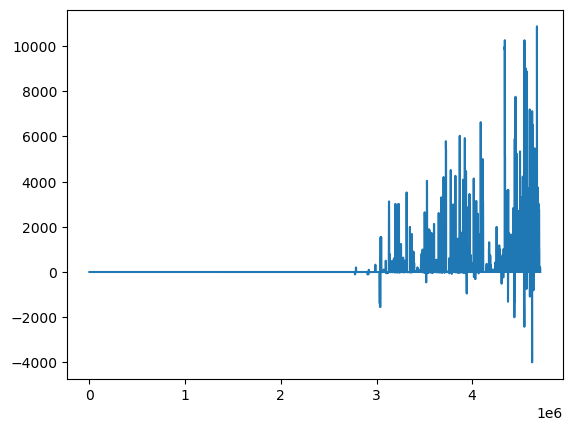

In [22]:
df521.balance.plot(x='day')

<Axes: >

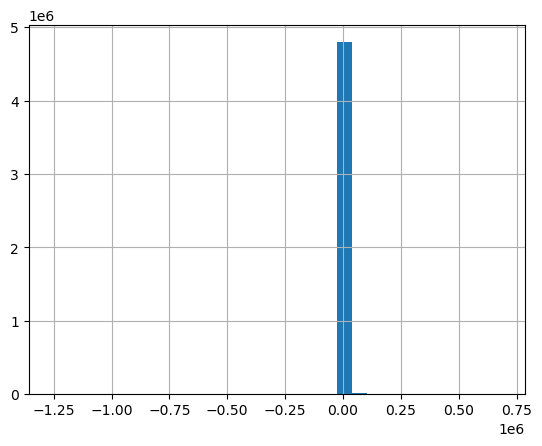

In [25]:
df['balance'].hist(bins=30)

<Axes: >

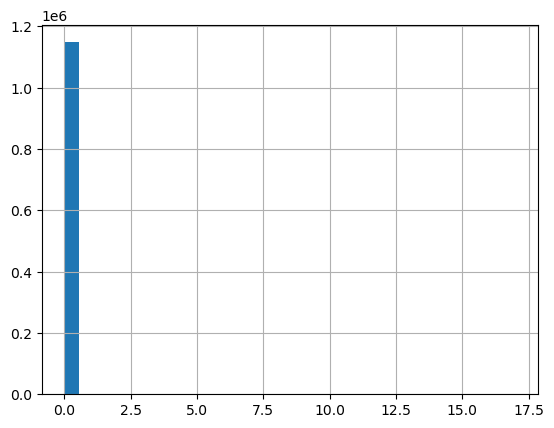

In [26]:
df['dso_pastdue'].hist(bins=30)

In [29]:
df['dso_deposit_day'].unique()

array([ nan,   0.,   1.,  15.,   4.,   2.,   3.,   6.,  24.,  23.,  22.,
         5.,  16.,  14.,   7.,   9.,   8., 235., 379., 374., 373., 372.,
       365., 304., 303., 302., 169., 163., 162., 155., 134., 120.,  78.,
        11.,  44.,  43.,  64.,  52.,  51.,  50.,  38.,  37.,  36.,  31.,
        30.,  29., 318., 317., 297., 296., 295., 277., 248., 247., 246.,
       213., 212., 211., 170.,  87.,  86.,  85.,  73.,  72.,  71.,  65.,
        59.,  58.,  57.])

In [30]:
df['id_main_branch'].unique()

array(['F521', 'F033', 'F776', 'F520', 'F032', 'F099', 'F519', 'F774',
       'F777', 'F518', 'F773', 'F778', 'F517', 'F030', 'F779', 'F516',
       'F029', 'F780', 'F515', 'F772', 'F781', 'F514', 'F771', 'F782',
       'F513', 'F028', 'F183', 'F512', 'F027', 'F184', 'F511', 'F026',
       'F185', 'F510', 'F770', 'F783', 'F509', 'F025', 'F784', 'F508',
       'F024', 'F785', 'F507', 'F023', 'F786', 'F506', 'F022', 'F787',
       'F505', 'F020', 'F788', 'F504', 'F769', 'F789', 'F503', 'F768',
       'F790', 'F502', 'F019', 'F186', 'F501', 'F767', 'F187', 'F500',
       'F766', 'F188', 'F499', 'F765', 'F189', 'F498', 'F764', 'F190',
       'F497', 'F763', 'F192', 'F496', 'F018', 'F193', 'F495', 'F017',
       'F791', 'F494', 'F762', 'F792', 'F493', 'F761', 'F198', 'F492',
       'F760', 'F793', 'F491', 'F758', 'F199', 'F490', 'F016', 'F200',
       'F489', 'F015', 'F794', 'F488', 'F014', 'F796', 'F487', 'F013',
       'F797', 'F486', 'F012', 'F798', 'F485', 'F756', 'F799', 'F484',
      

## Con los datos utilizados en el alarmado de KPR1

In [7]:
df = pd.read_csv('first_45_days_branch.csv')

In [9]:
df.describe()

,DAYS,COUNT,AMOUNT,GP
count,190779.000000,190779.000000,190779.000000,190779.000000
mean,22.399682,4.878163,2292.060546,13.967231
std,13.278708,10.570094,5548.596582,37.187106
min,0.000000,-10.000000,-10938.000000,-1717.310000
25%,11.000000,0.000000,0.000000,0.000000
50%,22.000000,1.000000,300.000000,2.250000
75%,34.000000,5.000000,2385.000000,13.900000
max,45.000000,439.000000,363209.000000,1820.510000


In [10]:
df.head()

,ID_BRANCH,ID_LOCATION,DATE,DAYS,DayOfWeekName,COUNT,AMOUNT,GP,FIRST_DAY
0,A00009,FL2606,2023-11-08,0,Wed,0,0,0.0,Wed
1,A00009,FL2606,2023-11-09,1,Thu,0,0,0.0,Wed
2,A00009,FL2606,2023-11-10,2,Fri,0,0,0.0,Wed
3,A00009,FL2606,2023-11-11,3,Sat,0,0,0.0,Wed
4,A00009,FL2606,2023-11-12,4,Sun,0,0,0.0,Wed


In [12]:
df['ID_LOCATION'].nunique()

4314

In [14]:
df.shape

(190779, 9)

In [15]:
df['FIRST_DAY'].unique()

array(['Wed', nan, 'Fri', 'Thu', 'Mon', 'Tue', 'Sat', 'Sun'], dtype=object)

In [18]:
df_location = df.groupby('FIRST_DAY')['ID_LOCATION'].nunique()
df_location = pd.DataFrame(df_location)

In [19]:
df_location

,ID_LOCATION
FIRST_DAY,
Fri,831
Mon,625
Sat,327
Sun,1
Thu,865
Tue,755
Wed,794


In [20]:
df_location['mean_amount'] = df.groupby('FIRST_DAY')['AMOUNT'].mean()
df_location

,ID_LOCATION,mean_amount
FIRST_DAY,,
Fri,831,2369.433521
Mon,625,2037.936813
Sat,327,2183.001973
Sun,1,4525.369565
Thu,865,2337.517352
Tue,755,2597.205278
Wed,794,2086.788739


In [21]:
df_location['mean_trxcnt'] = df.groupby('FIRST_DAY')['COUNT'].mean()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt
FIRST_DAY,,,
Fri,831,2369.433521,4.996737
Mon,625,2037.936813,4.322117
Sat,327,2183.001973,4.605469
Sun,1,4525.369565,11.565217
Thu,865,2337.517352,4.954764
Tue,755,2597.205278,5.621137
Wed,794,2086.788739,4.462548


In [22]:
df_location['max_trxcnt'] = df.groupby('FIRST_DAY')['COUNT'].max()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt,max_trxcnt
FIRST_DAY,,,,
Fri,831,2369.433521,4.996737,439
Mon,625,2037.936813,4.322117,118
Sat,327,2183.001973,4.605469,144
Sun,1,4525.369565,11.565217,33
Thu,865,2337.517352,4.954764,265
Tue,755,2597.205278,5.621137,429
Wed,794,2086.788739,4.462548,151


In [23]:
df_location['max_amount'] = df.groupby('FIRST_DAY')['AMOUNT'].max()
df_location

,ID_LOCATION,mean_amount,mean_trxcnt,max_trxcnt,max_amount
FIRST_DAY,,,,,
Fri,831,2369.433521,4.996737,439,352927
Mon,625,2037.936813,4.322117,118,81317
Sat,327,2183.001973,4.605469,144,74359
Sun,1,4525.369565,11.565217,33,15305
Thu,865,2337.517352,4.954764,265,149229
Tue,755,2597.205278,5.621137,429,363209
Wed,794,2086.788739,4.462548,151,87870


In [24]:
df.nlargest(10, 'AMOUNT')

,ID_BRANCH,ID_LOCATION,DATE,DAYS,DayOfWeekName,COUNT,AMOUNT,GP,FIRST_DAY
62908,A23207,CA4232,2022-10-15,25,Sat,429,363209,-40.98,Tue
94207,A23916,FL2272,2023-03-26,44,Sun,439,352927,163.45,Fri
62894,A23207,CA4232,2022-10-01,11,Sat,250,263006,2.20,Tue
62922,A23207,CA4232,2022-10-29,39,Sat,366,241471,-658.60,Tue
94206,A23916,FL2272,2023-03-25,43,Sat,305,214366,357.69,Fri
52434,A22961,MS0182,2022-09-10,39,Sat,390,191005,1099.47,Tue
94200,A23916,FL2272,2023-03-19,37,Sun,241,188221,934.12,Fri
94199,A23916,FL2272,2023-03-18,36,Sat,266,171375,1114.71,Fri
180788,A25863,NY1559,2024-01-08,25,Mon,115,149229,331.50,Thu
3718,A21763,AZ0157,2021-12-10,41,Fri,242,140899,398.60,NaN


# correlaciones?

In [ ]:
# Traer data de trx y montos

In [ ]:
#CREATE TABLE analytics.daily_check AS
SELECT
   CAST(RTRIM(p.id_main_branch_sent) AS VARCHAR(60)) AS AGENCY,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-11-30 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(p.id_main_branch_sent),
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE)

In [5]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''SELECT
   CAST(RTRIM(b.ID_LOCATION) AS VARCHAR(60)) AS AGENCY,
   a.ID_BRANCH as ID_BRANCH,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT,
   c.BALANCE as BALANCE
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
  LEFT JOIN AwsDataCatalog.viamericas.history_balance c ON c.id_main_branch = b.id_main_branch and c.date_balance = cast(a.DATE_RECEIVER as DATE)
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-01-01 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(b.ID_LOCATION),
   c.BALANCE, 
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE); ''', conn)

/tmp/ipykernel_18/809876169.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''SELECT


In [6]:
df

,AGENCY,DATE,TX,AMOUNT,BALANCE
0,OK0176,2024-01-16,4,863.0,14247.7242
1,CO0410,2023-03-20,3,750.0,5679.0004
2,CA3657,2023-07-04,5,940.0,5325.9994
3,FL1704,2023-02-04,9,4156.0,-53351.3701
4,DE0119,2023-05-14,53,28256.0,-198115.5800
...,...,...,...,...,...
1650095,CA4382,2023-09-07,4,3890.0,1970.0047
1650096,IL0785,2023-02-07,2,750.0,914.0006
1650097,PA0268,2023-10-30,42,36405.0,286.4914
1650098,WA0311,2023-11-03,8,4752.0,4358.8266


In [7]:
df.describe()

,TX,AMOUNT,BALANCE
count,1.650100e+06,1.650100e+06,1.649804e+06
mean,1.708824e+01,7.842763e+03,8.888206e+03
std,2.424096e+01,1.246419e+04,5.674177e+04
min,0.000000e+00,0.000000e+00,-2.853621e+07
25%,3.000000e+00,1.265000e+03,1.020159e+03
50%,9.000000e+00,3.785000e+03,5.176996e+03
75%,2.100000e+01,9.477000e+03,1.493354e+04
max,8.380000e+02,6.079065e+05,2.365007e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650100 entries, 0 to 1650099
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   AGENCY   1650100 non-null  object 
 1   DATE     1650100 non-null  object 
 2   TX       1650100 non-null  int64  
 3   AMOUNT   1650100 non-null  float64
 4   BALANCE  1649804 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 62.9+ MB


In [18]:
35932/69159 #casi 50% sin hsitory_balance sumando otro mes da el mismo % de missing, toamndo más historial desde enero 2023 sube a 51% con 153550 casi 100% datos menos meses

0.5195563845631082

In [9]:
df.to_csv('2023_trx_balance_history2.csv', index = False)

## Control charts

In [ ]:
import matplotlib.pyplot as plt
from ControlCharts import ShewhartControlModel

In [ ]:
# Group data by day and take the average of the Squared Error
grouped_data= data[['Day', 'Squared Error']].groupby(by='Day').mean()
grouped_data_std= data[['Day', 'Squared Error']].groupby(by='Day').std()
# Train-Test Split
x_train= grouped_data.iloc[:25, :].values.reshape((25,))
x_test= grouped_data.iloc[25:, :].values.reshape((25,))

In [ ]:
# Estimate standard deviation
qcc= pd.read_csv('BiasControlConstants/quality_control_constants.csv')
n= 20 # varia según el número de días que una agencia estuvo activa...
c4= qcc['c4'].loc[n-2]
sigma_train=np.average(grouped_data_std.values[:25])/(np.sqrt(n)*c4)

In [ ]:
# Build Shewhart Control Model
spc_model= ShewhartControlModel(k=3)
ucl, lcl= spc_model.fit(x_train, sigma= sigma_train)
ooc= spc_model.predict(x_test)
testing_plot=spc_model.plot(x=x_test, dpi= 100)
# Plot all data
complete_plot= spc_model.plot(x=grouped_data.values, dpi= 100)
train_plot= spc_model.plot(x=x_train, dpi= 100)

In [37]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df1 = pd.read_sql('''SELECT id FROM AwsDataCatalog.viamericas.locations WHERE ID_GROUP_COMPANY LIKE 'T0137'; ''', conn)

/tmp/ipykernel_21/2057683596.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql('''SELECT id FROM AwsDataCatalog.viamericas.locations WHERE ID_GROUP_COMPANY LIKE 'T0137'; ''', conn)


In [38]:
df1

,id


## Probando la vieja forma de default

In [16]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df = pd.read_sql('''WITH Payment_Agreeement as(
	SELECT
			DISTINCT
			REPLACE(RTRIM(b.ID_BRANCH),'C','A') AS ID_BRANCH
			,g.DATE_CREA_MAIN_BRANCH AS DATE_START
			,g.DEBITO_GROUP AS NEGOTIATED
			,g.CREDITO_GROUP AS PAID
			,g.BALANCE_GROUP AS BALANCE
	FROM	 viamericas.GROUP_BRANCH g INNER JOIN
			 viamericas.BRANCH b ON g.ID_MAIN_BRANCH = b.ID_MAIN_BRANCH
	WHERE	g.DEBITO_GROUP IS NOT NULL
			AND b.ID_LOCATION IS NOT NULL
			AND b.ID_BRANCH LIKE 'C%'
			AND g.DATE_CREA_MAIN_BRANCH < TIMESTAMP '2024-01-01'
)
SELECT  
		a.DATE_AUDIT
        , b.ID_LOCATION
		, a.ID_BRANCH
		, b.ID_MAIN_BRANCH
		, a.new_status
		, a. LAST_INACTIVATION_TYPE
		, CASE WHEN coalesce(g.BALANCE_GROUP, 0) < 0 THEN 0 ELSE coalesce(g.BALANCE_GROUP, 0) END AS CURRENT_BALANCE -- sI NEGATIVO, PONER CERO
		, p.DATE_START AS AGREEMENT_START_DATE
		, coalesce(p.BALANCE, 0) AS AGREEMENT_BALANCE
		, coalesce(p.NEGOTIATED, 0) AS AGREEMENT_INITIAL_AMOUNT
		, coalesce(p.PAID, 0) AS AGREEMENT_PAID
FROM	  viamericas . AUDIT_BRANCH_STATUS  a INNER JOIN
		 viamericas.BRANCH AS b  ON a.ID_BRANCH = b.ID_BRANCH INNER JOIN
		 viamericas .GROUP_BRANCH g ON b.ID_MAIN_BRANCH = g.ID_MAIN_BRANCH LEFT JOIN
		Payment_Agreeement p ON b.ID_BRANCH = p.ID_BRANCH
WHERE	 DATE_AUDIT  >= TIMESTAMP'2016-01-01'
		AND  DATE_AUDIT  < TIMESTAMP'2024-01-01'
		AND a.LAST_INACTIVATION_TYPE = 1
		AND a.OLD_FLAG = 'A'
		AND a. NEW_FLAG  = 'I'
		AND date_diff('day',a.DATE_AUDIT,TIMESTAMP'2024-01-01') > 5
		AND (RTRIM(b.ID_BRANCH) LIKE 'A%')
		AND b.ID_TYPE_BRANCH = 'R'
		AND NOT EXISTS( --no se volvio a re activar despueda de la inactivacion
			SELECT	'1'
			FROM	  viamericas . AUDIT_BRANCH_STATUS  b
			WHERE	b.OLD_FLAG = 'I'
					AND b. NEW_FLAG  = 'A'
					AND b.ID_BRANCH = a.ID_BRANCH
					AND b. DATE_AUDIT  > a. DATE_AUDIT 
		)
		AND NOT EXISTS( -- QUE NO ESTA ACTIVA HOY DIA
			SELECT '1' FROM viamericas.BRANCH WHERE  id_flag_branch = 'A' AND ID_MAIN_BRANCH = b.ID_MAIN_BRANCH
		) ''', conn)

/tmp/ipykernel_18/3093054830.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''WITH Payment_Agreeement as(


In [27]:
df.head()

,DATE_AUDIT,ID_LOCATION,ID_BRANCH,ID_MAIN_BRANCH,new_status,LAST_INACTIVATION_TYPE,CURRENT_BALANCE,AGREEMENT_START_DATE,AGREEMENT_BALANCE,AGREEMENT_INITIAL_AMOUNT,AGREEMENT_PAID,default
0,2018-07-05 14:18:14.967,GA0675,A07049,G654,O,1,0.0,NaT,0.0,0.00,0.00,1
1,2022-07-15 16:00:04.883,NJ1015,A22401,471E,O,1,0.0,2022-07-07 15:01:01.510,0.0,4153.43,4153.43,1
2,2018-10-12 09:31:50.487,UT0176,A17272,277Z,O,1,0.0,NaT,0.0,0.00,0.00,1
3,2017-06-29 12:09:19.533,AZ0045,A14703,197A,O,1,0.0,NaT,0.0,0.00,0.00,1
4,2019-02-15 16:40:55.150,NC1031,A12558,131J,O,1,0.0,NaT,0.0,0.00,0.00,1


In [18]:
df.describe()

,DATE_AUDIT,LAST_INACTIVATION_TYPE,CURRENT_BALANCE,AGREEMENT_START_DATE,AGREEMENT_BALANCE,AGREEMENT_INITIAL_AMOUNT,AGREEMENT_PAID
count,1887,1887.0,1887.000000,138,1887.000000,1887.000000,1887.000000
mean,2019-03-25 20:32:00.050475520,1.0,295.796926,2018-06-07 12:28:24.449007360,36.346153,1917.677689,1881.331537
min,2016-01-04 17:23:27.843000,1.0,0.000000,2009-05-20 18:03:09.317000,-500.000000,0.000000,0.000000
25%,2017-03-25 04:08:50.121499904,1.0,0.000000,2015-11-08 13:24:41.949500160,0.000000,0.000000,0.000000
50%,2018-07-19 17:26:49.409999872,1.0,0.000000,2019-03-20 06:22:40.944999936,0.000000,0.000000,0.000000
75%,2021-01-09 18:58:19.404999936,1.0,0.000000,2020-07-06 16:18:25.210749952,0.000000,0.000000,0.000000
max,2023-12-22 16:00:10.110000,1.0,57674.412100,2023-10-27 19:01:44.870000,46941.540000,229665.200000,229665.200000
std,NaN,0.0,2860.101252,NaN,1138.336824,12389.411695,12303.910983


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE_AUDIT                1887 non-null   datetime64[ns]
 1   ID_LOCATION               1887 non-null   object        
 2   ID_BRANCH                 1887 non-null   object        
 3   ID_MAIN_BRANCH            1887 non-null   object        
 4   new_status                1887 non-null   object        
 5   LAST_INACTIVATION_TYPE    1887 non-null   int64         
 6   CURRENT_BALANCE           1887 non-null   float64       
 7   AGREEMENT_START_DATE      138 non-null    datetime64[ns]
 8   AGREEMENT_BALANCE         1887 non-null   float64       
 9   AGREEMENT_INITIAL_AMOUNT  1887 non-null   float64       
 10  AGREEMENT_PAID            1887 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 162.3+ KB


<Axes: >

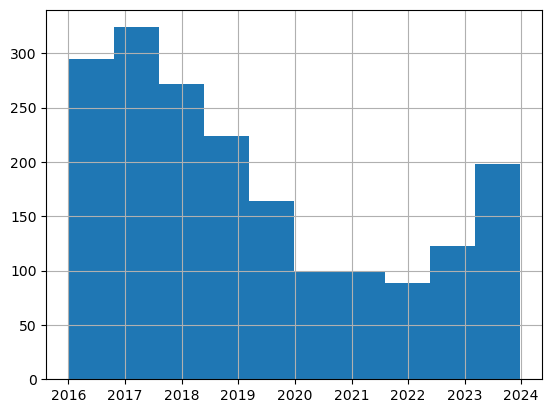

In [20]:
df['DATE_AUDIT'].hist()

<Axes: >

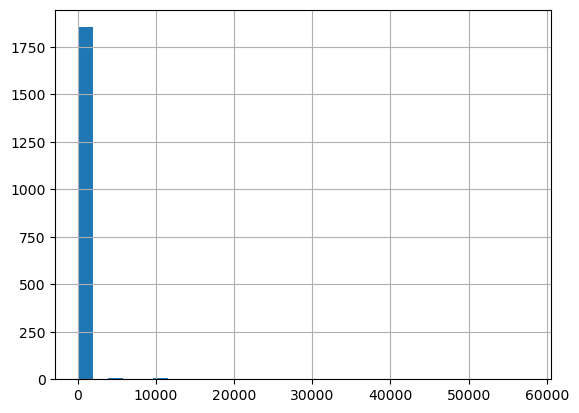

In [21]:
df['CURRENT_BALANCE'].hist(bins=30)

In [22]:
dfbal = df[df['CURRENT_BALANCE'] >100]

<Axes: >

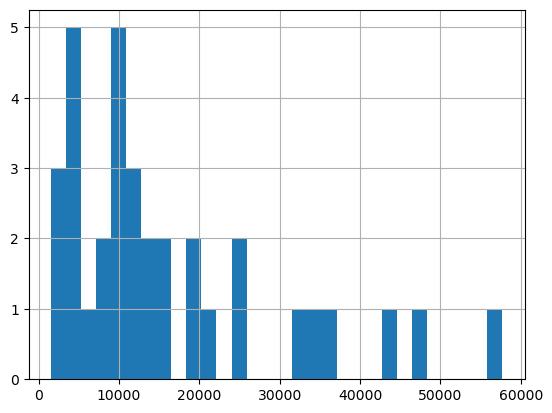

In [23]:
dfbal['CURRENT_BALANCE'].hist(bins=30)

In [26]:
df['default'] = 1

## Cruce con el hsitory balance

In [24]:
df2 = pd.read_csv('2023_trx_balance_history2.csv')

In [31]:
df2.shape

(1650100, 5)

In [33]:
df2.merge(df,how='left', left_on='AGENCY', right_on='ID_LOCATION')
# nos es la mejor forma tiene que ser x id_location y fecha aunquie no exacta...

,AGENCY,DATE,TX,AMOUNT,BALANCE,DATE_AUDIT,ID_LOCATION,ID_BRANCH,ID_MAIN_BRANCH,new_status,LAST_INACTIVATION_TYPE,CURRENT_BALANCE,AGREEMENT_START_DATE,AGREEMENT_BALANCE,AGREEMENT_INITIAL_AMOUNT,AGREEMENT_PAID,default
0,OK0176,2024-01-16,4,863.0,14247.7242,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,CO0410,2023-03-20,3,750.0,5679.0004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,CA3657,2023-07-04,5,940.0,5325.9994,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,FL1704,2023-02-04,9,4156.0,-53351.3701,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,DE0119,2023-05-14,53,28256.0,-198115.5800,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650658,CA4382,2023-09-07,4,3890.0,1970.0047,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1650659,IL0785,2023-02-07,2,750.0,914.0006,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1650660,PA0268,2023-10-30,42,36405.0,286.4914,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1650661,WA0311,2023-11-03,8,4752.0,4358.8266,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## Nueva forma de default pastdue>=15 días

In [5]:
default = pd.read_excel('Defaulted Agencies.xlsx')

In [6]:
default.columns

Index(['INACTIVATION_DATE', 'ID_BRANCH', 'CURRENT_EXTENDED_STATUS',
       'AGREEMENT_START_DATE', 'AGREEMENT_DAYS', 'AGREEMENT_BALANCE',
       'AGREEMENT_INITIAL_AMOUNT', 'AGREEMENT_PAID', 'OLD_STATUS', 'OLD_FLAG',
       'OLD_COMMENT', 'NEW_STATUS', 'NEW_FLAG', 'NEW_COMMENT',
       'LAST_INACTIVATION_TYPE', 'DESC_LAST_INACTIVATION_TYPE',
       'ACTIVATION_DATE', 'INACTIVE_DAYS'],
      dtype='object')

In [24]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26590 entries, 0 to 26589
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   INACTIVATION_DATE            26590 non-null  datetime64[ns]
 1   ID_BRANCH                    26590 non-null  object        
 2   CURRENT_EXTENDED_STATUS      26590 non-null  object        
 3   AGREEMENT_START_DATE         1416 non-null   datetime64[ns]
 4   AGREEMENT_DAYS               1416 non-null   float64       
 5   AGREEMENT_BALANCE            26590 non-null  float64       
 6   AGREEMENT_INITIAL_AMOUNT     26590 non-null  float64       
 7   AGREEMENT_PAID               26590 non-null  float64       
 8   OLD_STATUS                   26590 non-null  object        
 9   OLD_FLAG                     26590 non-null  object        
 10  OLD_COMMENT                  24717 non-null  object        
 11  NEW_STATUS                   26590 non-nu

<Axes: >

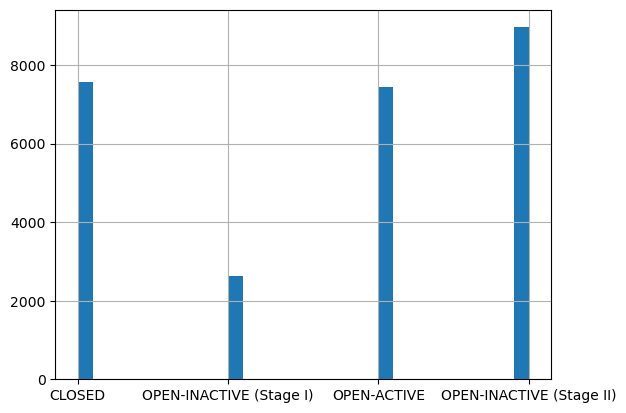

In [12]:
default['CURRENT_EXTENDED_STATUS'].hist(bins=30)

<Axes: >

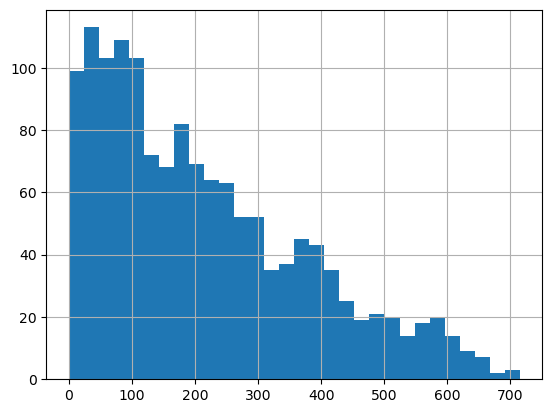

In [13]:
default['AGREEMENT_DAYS'].hist(bins=30)

<Axes: >

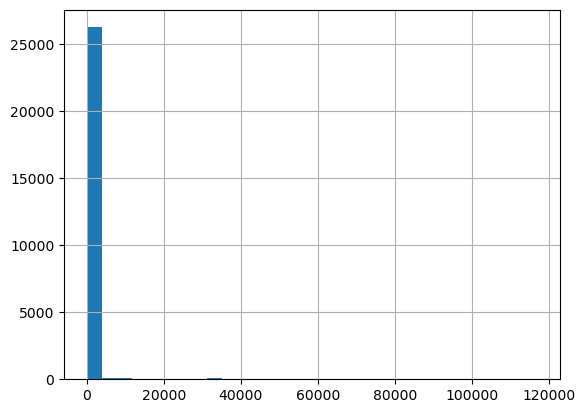

In [14]:
default['AGREEMENT_BALANCE'].hist(bins=30)

In [17]:
default['NEW_COMMENT'].unique()

array([nan, 'REACTIVACION AUTOMATICA PAST DUE',
       'PASTDUE/BALANCE VENCIDO INACTIVACION AUTOMATICA',
       'LOW PRODUCTION', 'REACTIVACIÓN DESDE DEPÓSITO',
       'Reactivación desde depósito', 'X APLICACIONES',
       'CHANGE OF OWNER. NEW A25319', 'FRAUD',
       'NO ACTIVAR - SSG & RICARDO', 'VIAGRICOLA -- ASK APPLICATIONS',
       'NO ESTAN TRABAJANCO CON LA PC', 'CIERRE DEL NEGOCIO',
       'UNUSUAL DEPOSITS', 'SEGUIRA TRABAJANDO, SE ACTIVA', 'LAST CHANCE',
       'J.CASTANEDA APPROVE REACTIVACTION', 'POTENTIAL FRAUD',
       'CODIGO CREADO POR ERROR'], dtype=object)

In [25]:
 default['AGREEMENT_BALANCE'].unique()

array([     0.  ,  21542.03,   3573.61,    350.  ,  62561.42,   6246.4 ,
         3786.26,    398.66,   1000.  ,  54603.58,  10937.99,   3438.46,
       117041.26,   6120.72,  34515.39,  28355.92,  86682.47,   5050.54,
        17567.29,   4000.  ,  11872.71,  12679.06,   4520.1 ,   6180.66])

<Axes: >

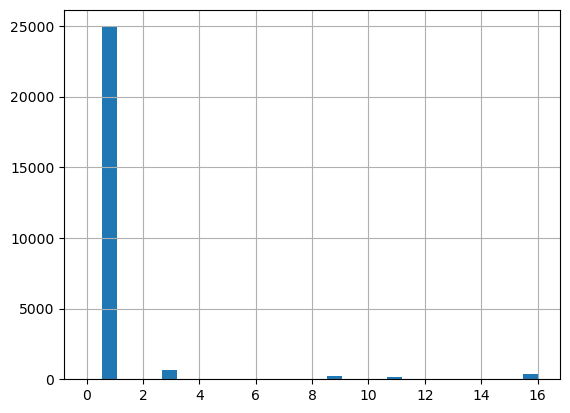

In [19]:
default['LAST_INACTIVATION_TYPE'].hist(bins=30)

<Axes: >

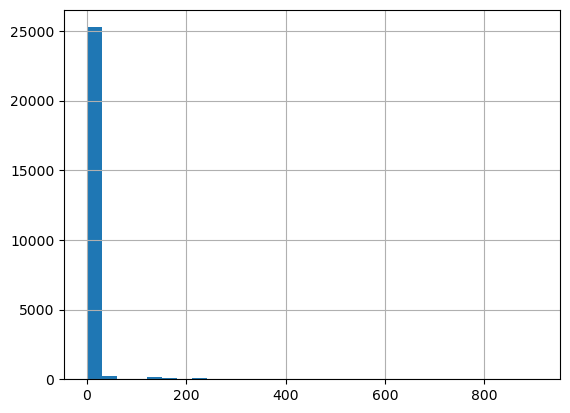

In [20]:
default['INACTIVE_DAYS'].hist(bins=30)

In [6]:
default4 = default[default['INACTIVE_DAYS'] > 15]

In [7]:
default4 = default4[default4['INACTIVE_DAYS'] < 101]

<Axes: >

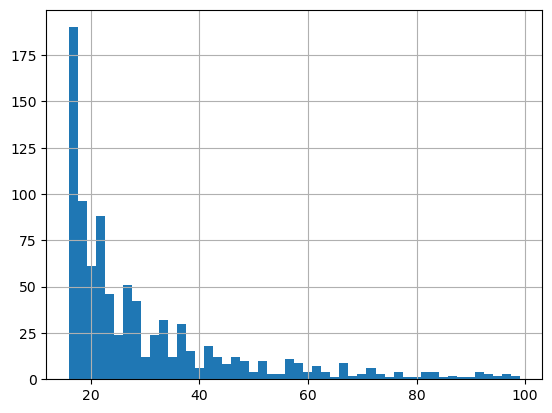

In [9]:
default4['INACTIVE_DAYS'].hist(bins=50)

In [6]:
default2 = default[default['INACTIVE_DAYS'] < 16]

<Axes: >

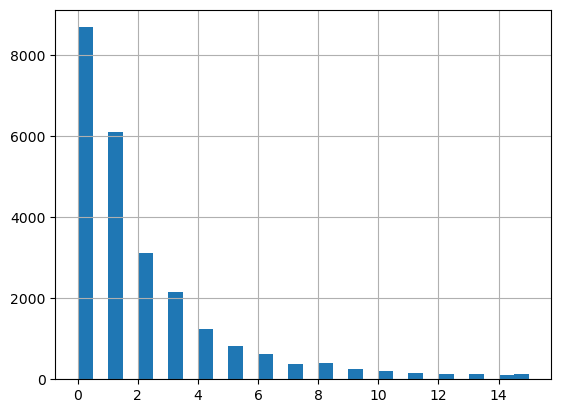

In [7]:
default2['INACTIVE_DAYS'].hist(bins=30)

In [12]:
default3 = default2[default2['INACTIVE_DAYS'] > 7]

<Axes: >

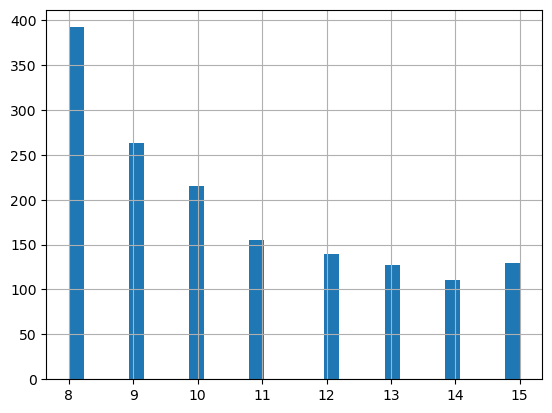

In [13]:
default3['INACTIVE_DAYS'].hist(bins=30)

In [17]:
default['days_to_agree'] = (default['INACTIVATION_DATE'] - default['AGREEMENT_START_DATE']).dt.days

<Axes: >

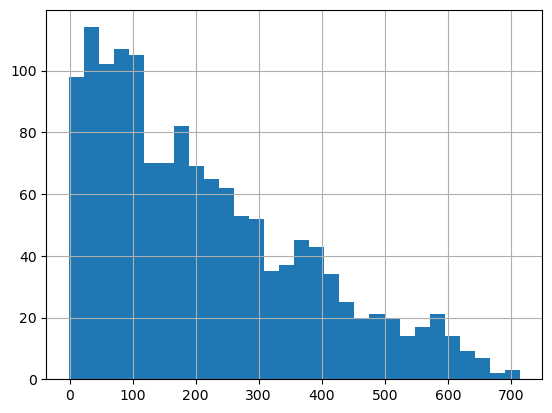

In [18]:
default['days_to_agree'].hist(bins=30)

### Repetir pero sólo con el historial deudor de las que efectivamente cerraron

In [19]:
closed = default[default['CURRENT_EXTENDED_STATUS'] == 'CLOSED']

In [20]:
closed2 = closed[closed['INACTIVE_DAYS'] < 16]

<Axes: >

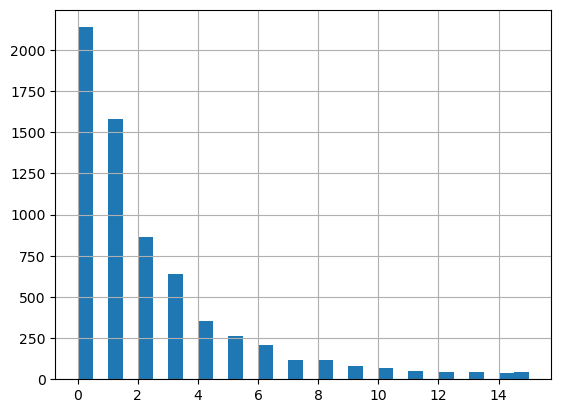

In [21]:
closed2['INACTIVE_DAYS'].hist(bins=30)

In [22]:
closed3 = closed2[closed2['INACTIVE_DAYS'] > 7]

<Axes: >

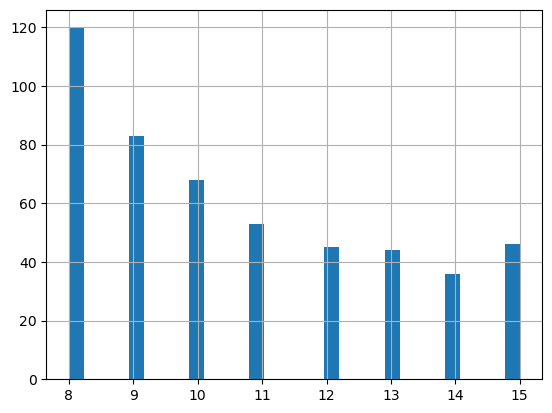

In [23]:
closed3['INACTIVE_DAYS'].hist(bins=30)

## Probando y comparando con las open

In [29]:
opened = default[default['CURRENT_EXTENDED_STATUS'] != 'CLOSED']

In [30]:
opened2 = opened[opened['INACTIVE_DAYS'] < 16]

<Axes: >

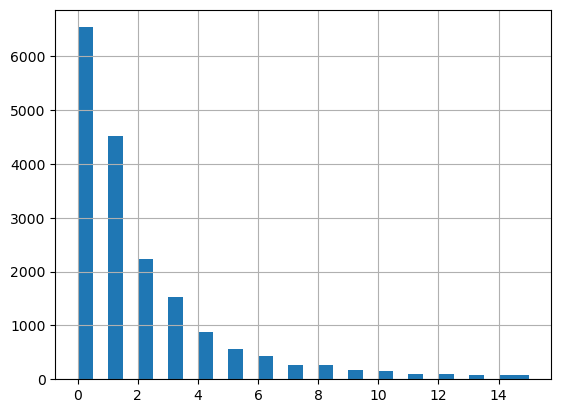

In [32]:
opened2['INACTIVE_DAYS'].hist(bins=30)

/tmp/ipykernel_18/1545340060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed2['INACTIVE_DAYS_C'] = closed2['INACTIVE_DAYS']
/tmp/ipykernel_18/1545340060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opened2['INACTIVE_DAYS_O'] = opened2['INACTIVE_DAYS']


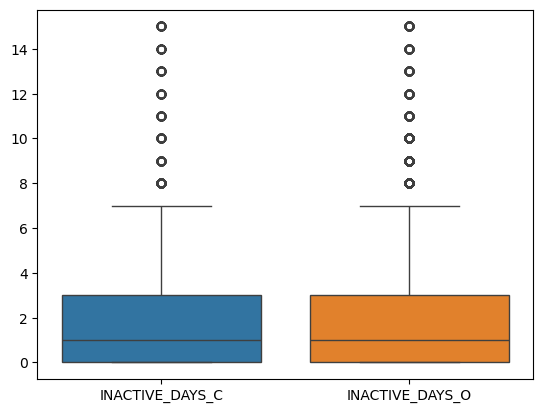

In [35]:

# Create two sample dataframes
closed2['INACTIVE_DAYS_C'] = closed2['INACTIVE_DAYS']
opened2['INACTIVE_DAYS_O'] = opened2['INACTIVE_DAYS']


# Combine the two dataframes into a single dataframe
df = pd.concat([closed2, opened2], axis=1)

#retain only the two columns of interest
lista = ['INACTIVE_DAYS_C', 'INACTIVE_DAYS_O']

df = df[lista]

# Create a boxplot with two columns
sns.boxplot(data=df)

# Add labels to the x-axis
plt.xticks([0, 1], ['INACTIVE_DAYS_C', 'INACTIVE_DAYS_O'])

# Show the plot
plt.show()

## % acumulativo de pagos en días inactivos.

In [6]:
df = default.groupby('INACTIVE_DAYS').count()

In [7]:
#calculate cumulative sum of column
df['cum_sum'] = df['ID_BRANCH'].cumsum()

#calculate cumulative percentage of column (rounded to 2 decimal places)
df['cum_percent'] = round(100*df.cum_sum/df['ID_BRANCH'].sum(),2)

<Axes: xlabel='INACTIVE_DAYS'>

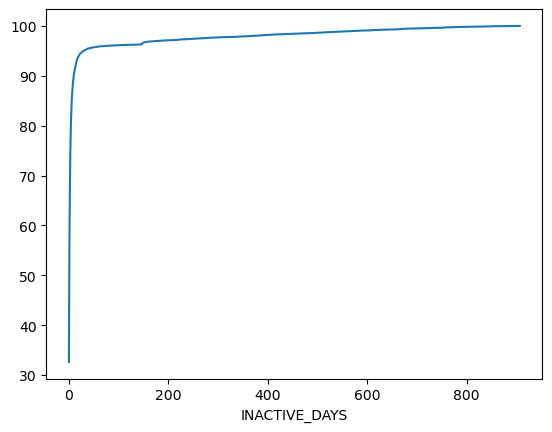

In [8]:
df['cum_percent'].plot()

In [13]:
df1 = df.head(30)

<Axes: xlabel='INACTIVE_DAYS'>

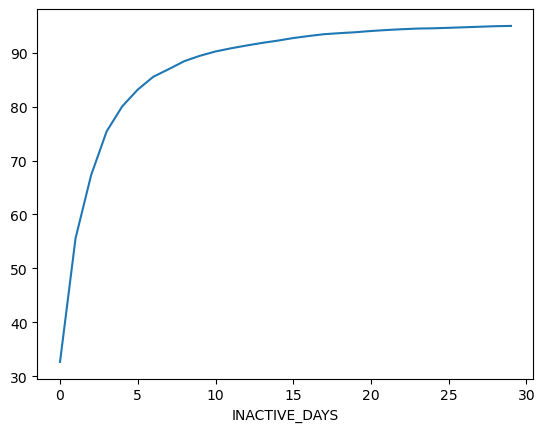

In [14]:
df1['cum_percent'].plot()

In [11]:
df1 = df.head(10)

<Axes: xlabel='INACTIVE_DAYS'>

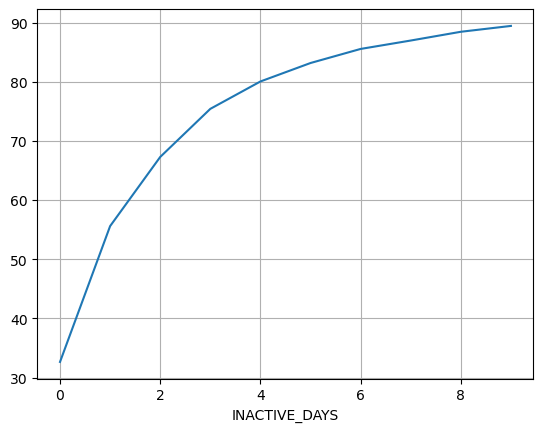

In [14]:
df1['cum_percent'].plot(grid = True)

In [ ]:
# traer datos útiles, fecha default y agencia
INACTIVATION_DATE', 'ID_BRANCH'

In [21]:
lista =['INACTIVATION_DATE', 'ID_BRANCH']
ag_def = default[lista]

In [23]:
ag_def['default'] = 1

/tmp/ipykernel_21/1140376000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ag_def['default'] = 1


In [24]:
ag_def

,INACTIVATION_DATE,ID_BRANCH,default
0,2022-10-28 12:25:56.080,A00216,1
1,2023-06-26 13:38:50.233,A00216,1
2,2022-01-03 21:33:23.410,A00219,1
3,2022-01-19 21:40:46.930,A00219,1
4,2022-02-02 20:20:44.217,A00219,1
...,...,...,...
26585,2023-05-17 17:44:49.360,AB0110,1
26586,2023-09-27 17:00:45.077,AB0110,1
26587,2023-10-14 16:13:33.273,AB0110,1
26588,2024-01-03 16:29:02.710,AB0110,1


df2 = pd.read_csv('2023_trx_balance_history2.csv') # le falta id_branch y las transacciones con cheques

In [28]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'

#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df2 = pd.read_sql('''with viacheck as(
SELECT
    DATE_FORMAT(ct.CheckDate, '%Y-%m-%d') AS DATE,
    COUNT(DISTINCT ct.checkID) AS TX_check,
    SUM(ct.AMOUNT) AS TOTAL_AMOUNT_check,
    b.id_location
FROM
    AwsDataCatalog.viamericas.checkTable ct
LEFT JOIN
    AwsDataCatalog.viamericas.BRANCH a ON a.id_branch = ct.CheckBranch
LEFT JOIN
    AwsDataCatalog.viamericas.location b ON a.id_location = b.id_location
       
WHERE
   NOT (a.id_branch LIKE 'T%')
   AND a.id_flag_branch = 'A'
   AND DATE_FORMAT(ct.CheckDate, '%Y-%m') between '2023-01' and '2024-02'
   AND  NOT b.id_location = 'NULL'
GROUP BY
    DATE_FORMAT(ct.CheckDate, '%Y-%m-%d'),
    b.id_location
    --b.name_location;
)
SELECT
   CAST(RTRIM(b.ID_LOCATION) AS VARCHAR(60)) AS AGENCY,
   a.ID_BRANCH as ID_BRANCH,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE) AS DATE,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE 1 END) AS TX,
   SUM(CASE WHEN (A.ID_FLAG_RECEIVER = 'A' OR A.ID_FLAG_RECEIVER = 'C') THEN 0 ELSE A.NET_AMOUNT_RECEIVER END) as AMOUNT,
   c.BALANCE as BALANCE,
   coalesce(d.TX_check, 0) as TX_check,
   coalesce(d.TOTAL_AMOUNT_check, 0) as TOTAL_AMOUNT_check
 FROM
   AwsDataCatalog.viamericas.RECEIVER a
   INNER JOIN AwsDataCatalog.viamericas.GROUP_BRANCH p ON p.ID_MAIN_BRANCH = CASE WHEN a.ID_MAIN_BRANCH_EXPIRED IS NULL THEN RTRIM(a.ID_MAIN_BRANCH_SENT) ELSE RTRIM(a.ID_MAIN_BRANCH_EXPIRED) END
   LEFT JOIN AwsDataCatalog.viamericas.BRANCH b ON a.ID_BRANCH = b.ID_BRANCH
   LEFT JOIN AwsDataCatalog.viamericas.history_balance c ON c.id_main_branch = b.id_main_branch and c.date_balance = cast(a.DATE_RECEIVER as DATE)
   LEFT JOIN viacheck d ON d.id_location = b.ID_LOCATION and cast(d.DATE as DATE) = cast(a.DATE_RECEIVER as DATE)
 WHERE
   NOT (A.ID_MAIN_BRANCH_SENT LIKE 'M%')
   AND NOT (A.ID_BRANCH LIKE 'T%')
   AND SUBSTRING(b.id_branch, 1, 1) IN (SELECT SUBSTRING(PREFIX, 1, 1) FROM AwsDataCatalog.viamericas.BRANCH_PREFIX P WHERE TRIM(B.ID_COUNTRY) = TRIM(P.ID_COUNTRY))
   AND A.DATE_RECEIVER >= TIMESTAMP '2023-01-01 00:00:00.000'
   AND A.DATE_RECEIVER < TIMESTAMP '2024-02-04 00:00:00.000'
   AND b.ID_LOCATION IS NOT NULL
   AND b.ID_LOCATION NOT IN ('MD0010', 'MD0952', 'AK0003', 'CA3897', 'NY1130', 'MD0696', 'FL1933', 'AK0004', 'CA4046', 'NY1221', 'MD0623', 'MD1003', 'MD1018', 'AK0008', 'CA4291', 'NY1346', 'CA4350', 'NY1381','OK0236','FL2287','CA4391','AK0009', 'NY1397','CA4392','AK0010','FL2288','NY1399','AK0012','CA4396','NY1402','FL2289','AK0013', 'CA4418','NY1410','FL2301','AK0014', 'CA4428', 'NY1413')
   AND a.NET_AMOUNT_RECEIVER <> 0
 GROUP BY
   RTRIM(b.ID_LOCATION),
   a.ID_BRANCH,
   c.BALANCE, 
   d.TX_check,
   d.TOTAL_AMOUNT_check,
   CAST(DATE_FORMAT(a.DATE_RECEIVER, '%Y-%m-%d') AS DATE); ''', conn)

/tmp/ipykernel_21/579190763.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql('''with viacheck as(


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659233 entries, 0 to 1659232
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   AGENCY              1659233 non-null  object 
 1   ID_BRANCH           1659233 non-null  object 
 2   DATE                1659233 non-null  object 
 3   TX                  1659233 non-null  int64  
 4   AMOUNT              1659233 non-null  float64
 5   BALANCE             1658937 non-null  float64
 6   TX_check            1659233 non-null  int64  
 7   TOTAL_AMOUNT_check  1659233 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 101.3+ MB


In [33]:
default['DATE'] = default['INACTIVATION_DATE']

In [34]:
default['DATE'] #trim la hora para que sea cruzable

0       2022-10-28 12:25:56.080
1       2023-06-26 13:38:50.233
2       2022-01-03 21:33:23.410
3       2022-01-19 21:40:46.930
4       2022-02-02 20:20:44.217
                  ...          
26585   2023-05-17 17:44:49.360
26586   2023-09-27 17:00:45.077
26587   2023-10-14 16:13:33.273
26588   2024-01-03 16:29:02.710
26589   2024-01-08 16:13:00.777
Name: DATE, Length: 26590, dtype: datetime64[ns]

## Unir con data anterior 

In [6]:
df1 = pd.read_csv('2023_trx_balance_check_history3.csv')

In [7]:
df1.head()

,AGENCY,ID_BRANCH,DATE,TX,AMOUNT,BALANCE,TX_check,TOTAL_AMOUNT_check
0,TX1227,A22569,2023-08-13,17,10456.0,17741.8308,0,0.00
1,MD0948,A21038,2023-01-07,15,5939.0,-40677.1548,72,45021.39
2,FL1949,A19390,2023-10-03,1,2841.0,-38.4020,0,0.00
3,NJ0685,A15258,2023-08-28,8,2580.0,5474.4995,0,0.00
4,CA4183,A22917,2023-04-04,14,4806.0,-24382.5306,4,12354.42


In [8]:
df2 = pd.read_excel('Defaulted Agencies.xlsx')

In [9]:
#cambiar la fecha INACTIVATION_DATE a formato y-m-d y su nombre a DATE, filtrar sólo los inactive days mayores a 15 y llamarlos default
df2['DATE'] = df2['INACTIVATION_DATE'].dt.date

In [10]:
df3 = df2 #[df2['INACTIVE_DAYS'] > 4] #me quedo con 5 días inactivos en adelante

In [11]:
lista =['DATE', 'ID_BRANCH', 'INACTIVE_DAYS'] #'DEFAULT']
df3 = df3[lista]

In [12]:
df3.shape

(26590, 3)

In [13]:
df3['DATE'] = pd.to_datetime(df3['DATE'])

/tmp/ipykernel_18/4062165928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DATE'] = pd.to_datetime(df3['DATE'])


In [14]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [15]:
merged_df = pd.merge(df1, df3, on=['DATE', 'ID_BRANCH'], how='outer')
# efectivamente los sucesos de default ocurren en fechas que no registran actividad alguna en las agencias

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679323 entries, 0 to 1679322
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   AGENCY              1659323 non-null  object        
 1   ID_BRANCH           1679323 non-null  object        
 2   DATE                1679323 non-null  datetime64[ns]
 3   TX                  1659323 non-null  float64       
 4   AMOUNT              1659323 non-null  float64       
 5   BALANCE             1659027 non-null  float64       
 6   TX_check            1659323 non-null  float64       
 7   TOTAL_AMOUNT_check  1659323 non-null  float64       
 8   INACTIVE_DAYS       26590 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 115.3+ MB


get some table with:
    number of acitve agencies at monday '2023-09-04' 3972
    number of inactivated agencies at next we '2023-09-13' 119
    number of inactivated at +1,2 ,3 ,4,5,6 and 7 days after

In [17]:
prev = merged_df[merged_df['DATE'] == '2023-09-04']

In [18]:
prev.shape

(3978, 9)

In [19]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3978 entries, 1000880 to 1004857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AGENCY              3973 non-null   object        
 1   ID_BRANCH           3978 non-null   object        
 2   DATE                3978 non-null   datetime64[ns]
 3   TX                  3973 non-null   float64       
 4   AMOUNT              3973 non-null   float64       
 5   BALANCE             3972 non-null   float64       
 6   TX_check            3973 non-null   float64       
 7   TOTAL_AMOUNT_check  3973 non-null   float64       
 8   INACTIVE_DAYS       6 non-null      float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 310.8+ KB


In [20]:
prev2 = merged_df[merged_df['DATE'] == '2023-09-13']

In [21]:
prev2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4354 entries, 1040254 to 1044607
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AGENCY              4293 non-null   object        
 1   ID_BRANCH           4354 non-null   object        
 2   DATE                4354 non-null   datetime64[ns]
 3   TX                  4293 non-null   float64       
 4   AMOUNT              4293 non-null   float64       
 5   BALANCE             4291 non-null   float64       
 6   TX_check            4293 non-null   float64       
 7   TOTAL_AMOUNT_check  4293 non-null   float64       
 8   INACTIVE_DAYS       119 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 340.2+ KB


In [23]:
prev2.groupby('INACTIVE_DAYS')['ID_BRANCH'].count()

INACTIVE_DAYS
0.0      40
1.0      21
2.0      16
3.0      10
4.0       7
5.0       5
6.0       5
8.0       1
9.0       2
10.0      1
12.0      2
13.0      1
15.0      2
20.0      1
21.0      1
22.0      1
50.0      1
289.0     2
Name: ID_BRANCH, dtype: int64

In [85]:
merged_df2 = pd.merge(df1, df3, on=['DATE', 'ID_BRANCH'], how='outer', indicator=True)

In [86]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663656 entries, 0 to 1663655
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   AGENCY              1659233 non-null  object        
 1   ID_BRANCH           1663656 non-null  object        
 2   DATE                1663656 non-null  datetime64[ns]
 3   TX                  1659233 non-null  float64       
 4   AMOUNT              1659233 non-null  float64       
 5   BALANCE             1658937 non-null  float64       
 6   TX_check            1659233 non-null  float64       
 7   TOTAL_AMOUNT_check  1659233 non-null  float64       
 8   DEFAULT             5304 non-null     float64       
 9   _merge              1663656 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(6), object(2)
memory usage: 115.8+ MB


In [88]:
merged_df2.groupby('_merge').count()

/tmp/ipykernel_18/1903216043.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df2.groupby('_merge').count()


,AGENCY,ID_BRANCH,DATE,TX,AMOUNT,BALANCE,TX_check,TOTAL_AMOUNT_check,DEFAULT
_merge,,,,,,,,,
left_only,1658352,1658352,1658352,1658352,1658352,1658056,1658352,1658352,0
right_only,0,4423,4423,0,0,0,0,0,4423
both,881,881,881,881,881,881,881,881,881


Según el tipo de merge:
    inner 881 defaults
    outer 5304 defaults (total tmb) pero toma 881 cruzados + 4423 sin cruzar
    left 881 defaults

## Modelo predicción de default

In [91]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

In [16]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.sort_values(by=['ID_BRANCH','DATE'])
merged_df['roll_mean_month_balance'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['BALANCE'].rolling('30D').mean().round(2).to_numpy()

In [22]:
merged_df.head()

,AGENCY,ID_BRANCH,DATE,TX,AMOUNT,BALANCE,TX_check,TOTAL_AMOUNT_check,DEFAULT,roll_mean_month_balance,roll_mean_week_balance,roll_max_week_balance,roll_max_month_balance
4071,MD0002,A00002,2023-01-02,0.0,0.0,13853.8257,0.0,0.0,NaN,13853.83,13853.83,13853.8257,13853.8257
11342,MD0002,A00002,2023-01-04,1.0,340.0,13853.8257,0.0,0.0,NaN,13853.83,13853.83,13853.8257,13853.8257
15036,MD0002,A00002,2023-01-05,1.0,25.0,14202.1057,0.0,0.0,NaN,13969.92,13969.92,14202.1057,14202.1057
29691,MD0002,A00002,2023-01-09,6.0,6.0,14232.1057,0.0,0.0,NaN,14035.47,14096.01,14232.1057,14232.1057
33511,MD0002,A00002,2023-01-10,1.0,1.0,14268.1057,0.0,0.0,NaN,14081.99,14139.04,14268.1057,14268.1057


In [21]:
merged_df['roll_mean_week_balance'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['BALANCE'].rolling('7D').mean().round(2).to_numpy()
merged_df['roll_max_week_balance'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['BALANCE'].rolling('7D').max().to_numpy()
merged_df['roll_mean_month_balance'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['BALANCE'].rolling('30D').mean().round(2).to_numpy()
merged_df['roll_max_month_balance'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['BALANCE'].rolling('30D').max().to_numpy()

In [23]:
merged_df['roll_mean_week_AMOUNT'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['AMOUNT'].rolling('7D').mean().round(2).to_numpy()
merged_df['roll_max_week_AMOUNT'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['AMOUNT'].rolling('7D').max().to_numpy()
merged_df['roll_mean_month_AMOUNT'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['AMOUNT'].rolling('30D').mean().round(2).to_numpy()
merged_df['roll_max_month_AMOUNT'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['AMOUNT'].rolling('30D').max().to_numpy()

In [24]:
merged_df['roll_mean_week_TOTAL_AMOUNT_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TOTAL_AMOUNT_check'].rolling('7D').mean().round(2).to_numpy()
merged_df['roll_max_week_TOTAL_AMOUNT_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TOTAL_AMOUNT_check'].rolling('7D').max().to_numpy()
merged_df['roll_mean_month_TOTAL_AMOUNT_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TOTAL_AMOUNT_check'].rolling('30D').mean().round(2).to_numpy()
merged_df['roll_max_month_TOTAL_AMOUNT_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TOTAL_AMOUNT_check'].rolling('30D').max().to_numpy()

In [25]:
merged_df['roll_mean_week_TX'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX'].rolling('7D').mean().round(2).to_numpy()
merged_df['roll_max_week_TX'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX'].rolling('7D').max().to_numpy()
merged_df['roll_mean_month_TX'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX'].rolling('30D').mean().round(2).to_numpy()
merged_df['roll_max_month_TX'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX'].rolling('30D').max().to_numpy()

In [26]:
merged_df['roll_mean_week_TX_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX_check'].rolling('7D').mean().round(2).to_numpy()
merged_df['roll_max_week_TX_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX_check'].rolling('7D').max().to_numpy()
merged_df['roll_mean_month_TX_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX_check'].rolling('30D').mean().round(2).to_numpy()
merged_df['roll_max_month_TX_check'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['TX_check'].rolling('30D').max().to_numpy()

In [27]:
merged_df['roll_sum_month_default'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['DEFAULT'].rolling('30D').sum().to_numpy()

In [32]:
merged_df['roll_sum_2month_default'] = merged_df.set_index('DATE').groupby('ID_BRANCH', sort=False)['DEFAULT'].rolling('60D').sum().to_numpy()

In [29]:
# la variale de default pasa info de la target?
defa= merged_df[merged_df['DEFAULT']==1]

In [30]:
defa

,AGENCY,ID_BRANCH,DATE,TX,AMOUNT,BALANCE,TX_check,TOTAL_AMOUNT_check,DEFAULT,roll_mean_month_balance,...,roll_max_month_TOTAL_AMOUNT_check,roll_mean_week_TX,roll_max_week_TX,roll_mean_month_TX,roll_max_month_TX,roll_mean_week_TX_check,roll_max_week_TX_check,roll_mean_month_TX_check,roll_max_month_TX_check,roll_sum_month_default
692606,NaN,A00216,2023-06-26,NaN,NaN,NaN,NaN,NaN,1.0,18983.11,...,0.0,22.17,37.0,28.12,41.0,0.0,0.0,0.00,0.0,1.0
491709,CA1540,A00219,2023-05-08,3.0,1052.0,5161.6987,0.0,0.0,1.0,1580.23,...,0.0,3.25,6.0,1.70,6.0,0.0,0.0,0.00,0.0,1.0
778459,NaN,A00219,2023-07-17,NaN,NaN,NaN,NaN,NaN,1.0,3669.13,...,0.0,6.67,10.0,4.53,25.0,0.0,0.0,0.00,0.0,1.0
837144,NaN,A00219,2023-07-31,NaN,NaN,NaN,NaN,NaN,1.0,4038.82,...,0.0,6.40,12.0,5.08,12.0,0.0,0.0,0.00,0.0,2.0
926659,NaN,A00219,2023-08-21,NaN,NaN,NaN,NaN,NaN,1.0,4644.08,...,0.0,NaN,NaN,4.58,12.0,NaN,NaN,0.00,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,NaN,AB0110,2022-07-18,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1471,NaN,AB0110,2022-08-24,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2219,NaN,AB0110,2022-12-14,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
93001,VA0003,AB0110,2023-01-25,10.0,4924.0,4359.7098,0.0,0.0,1.0,4780.77,...,5324.0,4.43,10.0,4.32,10.0,0.0,0.0,0.91,7.0,1.0


In [33]:
merged_df['roll_sum_2month_default'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

# Target

In [34]:
merged_df['TARGET'] = merged_df.sort_values(by=['DATE']).groupby('ID_BRANCH')['DEFAULT'].shift(-1)

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663656 entries, 4071 to 1499937
Data columns (total 32 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   AGENCY                              1659233 non-null  object        
 1   ID_BRANCH                           1663656 non-null  object        
 2   DATE                                1663656 non-null  datetime64[ns]
 3   TX                                  1659233 non-null  float64       
 4   AMOUNT                              1659233 non-null  float64       
 5   BALANCE                             1658937 non-null  float64       
 6   TX_check                            1659233 non-null  float64       
 7   TOTAL_AMOUNT_check                  1659233 non-null  float64       
 8   DEFAULT                             5304 non-null     float64       
 9   roll_mean_month_balance             1660692 non-null  float64       
 

In [64]:
merged_df.head(3)

AGENCY  TX  AMOUNT  BALANCE  TX_check  \
DATE       ID_BRANCH                                         
2022-01-03 A09098       NaN NaN     NaN      NaN       NaN   
           A10537       NaN NaN     NaN      NaN       NaN   
           A15244       NaN NaN     NaN      NaN       NaN   

                      TOTAL_AMOUNT_check  DEFAULT  
DATE       ID_BRANCH                               
2022-01-03 A09098                    NaN      1.0  
           A10537                    NaN      1.0  
           A15244                    NaN      1.0

In [94]:
index_counts = merged_df.index.value_counts()


In [95]:
repeated_index_values = index_counts[index_counts > 1]
print(repeated_index_values)


Series([], Name: count, dtype: int64)


## Nueva forma de default pastdue>=7 días

In [5]:
default = pd.read_csv('Datos Juan.csv')

In [6]:
default.columns

Index(['INACTIVATION_DATE', 'ID_BRANCH', 'CURRENT_EXTENDED_STATUS',
       'AGREEMENT_START_DATE', 'AGREEMENT_DAYS', 'AGREEMENT_BALANCE',
       'AGREEMENT_INITIAL_AMOUNT', 'AGREEMENT_PAID', 'OLD_STATUS', 'OLD_FLAG',
       'OLD_COMMENT', 'NEW_STATUS', 'NEW_FLAG', 'NEW_COMMENT',
       'LAST_INACTIVATION_TYPE', 'DESC_LAST_INACTIVATION_TYPE',
       'ACTIVATION_DATE', 'INACTIVE_DAYS'],
      dtype='object')

In [7]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INACTIVATION_DATE            42084 non-null  object 
 1   ID_BRANCH                    42084 non-null  object 
 2   CURRENT_EXTENDED_STATUS      42084 non-null  object 
 3   AGREEMENT_START_DATE         1756 non-null   object 
 4   AGREEMENT_DAYS               1756 non-null   float64
 5   AGREEMENT_BALANCE            42084 non-null  float64
 6   AGREEMENT_INITIAL_AMOUNT     42084 non-null  float64
 7   AGREEMENT_PAID               42084 non-null  float64
 8   OLD_STATUS                   42084 non-null  object 
 9   OLD_FLAG                     42084 non-null  object 
 10  OLD_COMMENT                  39164 non-null  object 
 11  NEW_STATUS                   42084 non-null  object 
 12  NEW_FLAG                     42084 non-null  object 
 13  NEW_COMMENT     

In [14]:
default['INACTIVATION_DATE'].max()

'2024-02-03 08:33:04.770'

In [15]:
default['INACTIVATION_DATE'].min()

'2022-01-03 11:22:50.777'

<Axes: >

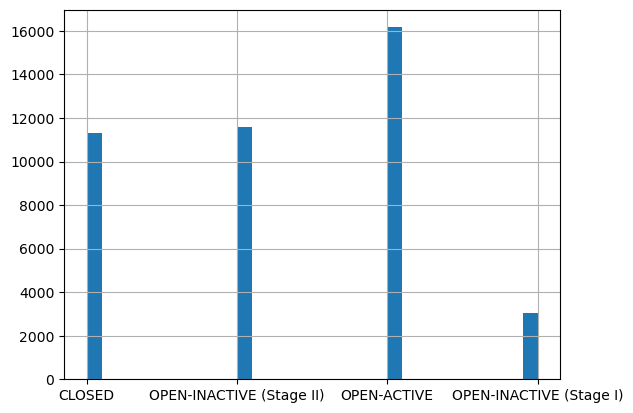

In [8]:
default['CURRENT_EXTENDED_STATUS'].hist(bins=30)

<Axes: >

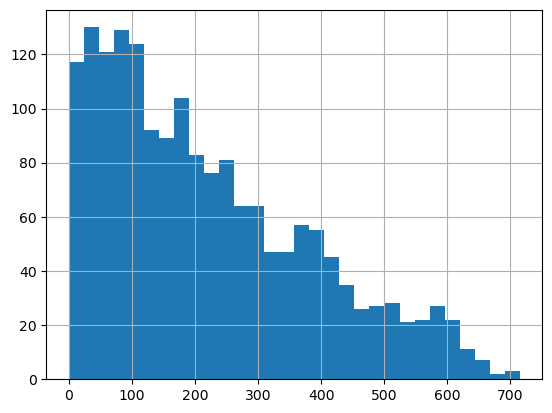

In [9]:
default['AGREEMENT_DAYS'].hist(bins=30)

<Axes: >

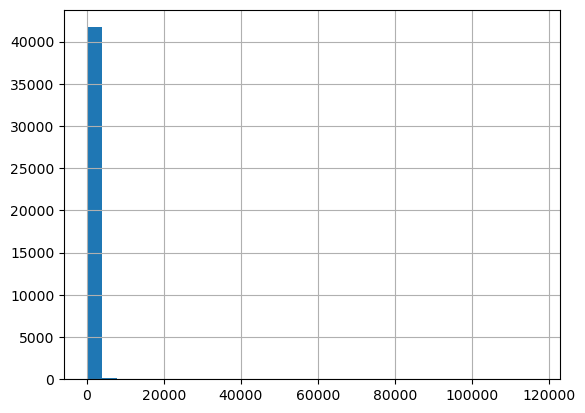

In [10]:
default['AGREEMENT_BALANCE'].hist(bins=30)

In [11]:
default['NEW_COMMENT'].unique()

array(['PASTDUE/BALANCE VENCIDO INACTIVACION AUTOMATICA',
       'REACTIVACION AUTOMATICA PAST DUE', nan, 'LOW PRODUCTION',
       '102907 CREDITO 2500', 'REACTIVACIÓN DESDE DEPÓSITO',
       'Reactivación desde depósito', 'X APLICACIONES',
       'CHANGE OF OWNER. NEW A25319', 'HYBRID AG ONLY WORK:  A16167',
       'FRAUD', 'SOLO MANTENER A17397', 'NO ACTIVAR - SSG & RICARDO',
       'VIAGRICOLA -- ASK APPLICATIONS', 'NO ESTAN TRABAJANCO CON LA PC',
       'CIERRE DEL NEGOCIO', 'UNUSUAL DEPOSITS',
       'SEGUIRA TRABAJANDO, SE ACTIVA', 'LAST CHANCE',
       'J.CASTANEDA APPROVE REACTIVACTION', 'POTENTIAL FRAUD',
       'COMMONWEALTH OF MASSACHUSETTS', 'CODIGO CREADO POR ERROR'],
      dtype=object)

In [12]:
 default['AGREEMENT_BALANCE'].unique()

array([     0.  ,  21542.03,   3573.61,  59061.42,   6246.4 ,   3786.26,
          700.  ,  51603.58,  11026.47,   4878.43,   1975.04, 117041.26,
         2258.61,   5986.77,  34015.39,  28090.43,   5050.54,   2737.  ,
        16260.57,   4000.  ,  11872.71,  11179.06,   1588.16,   3762.57,
         4020.1 ,    480.  ])

<Axes: >

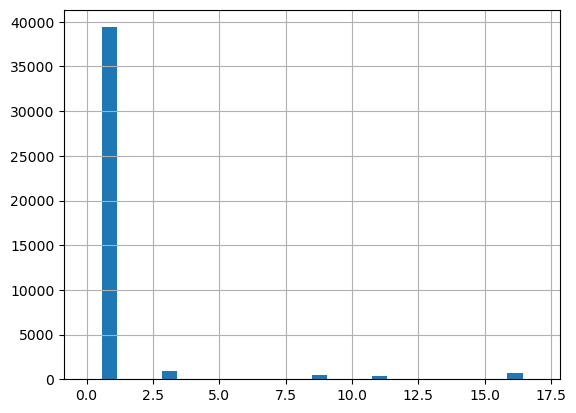

In [13]:
default['LAST_INACTIVATION_TYPE'].hist(bins=30)

<Axes: >

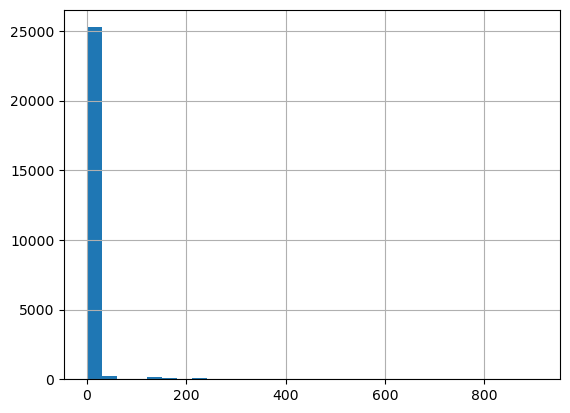

In [20]:
default['INACTIVE_DAYS'].hist(bins=30)

In [6]:
default4 = default[default['INACTIVE_DAYS'] > 15]

In [7]:
default4 = default4[default4['INACTIVE_DAYS'] < 101]

<Axes: >

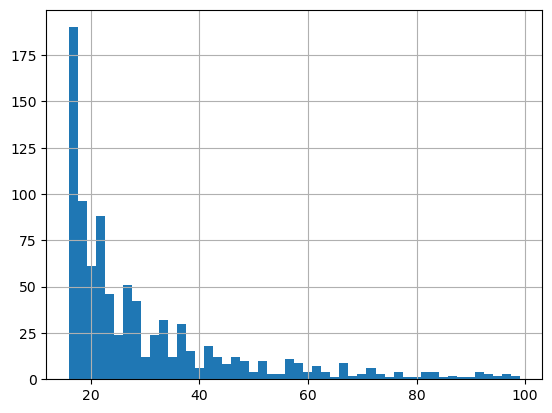

In [9]:
default4['INACTIVE_DAYS'].hist(bins=50)

In [6]:
default2 = default[default['INACTIVE_DAYS'] < 16]

<Axes: >

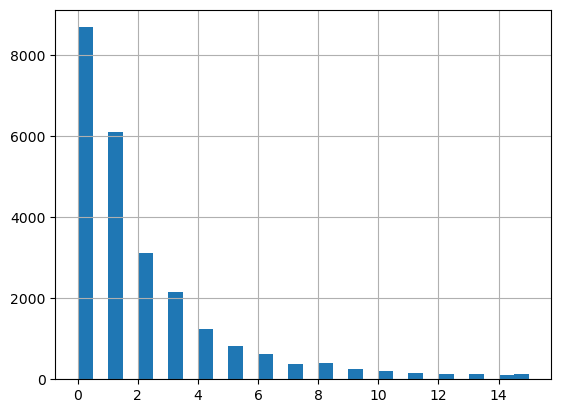

In [7]:
default2['INACTIVE_DAYS'].hist(bins=30)

In [12]:
default3 = default2[default2['INACTIVE_DAYS'] > 7]

<Axes: >

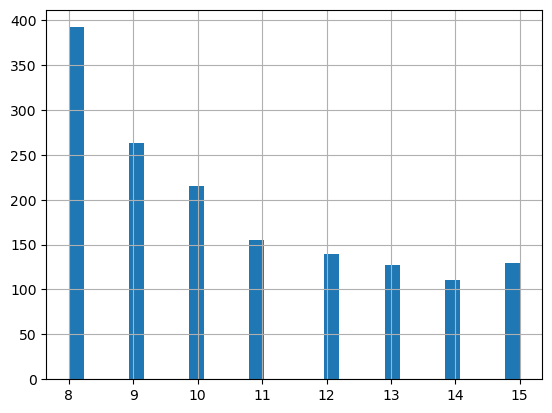

In [13]:
default3['INACTIVE_DAYS'].hist(bins=30)

In [17]:
default['days_to_agree'] = (default['INACTIVATION_DATE'] - default['AGREEMENT_START_DATE']).dt.days

<Axes: >

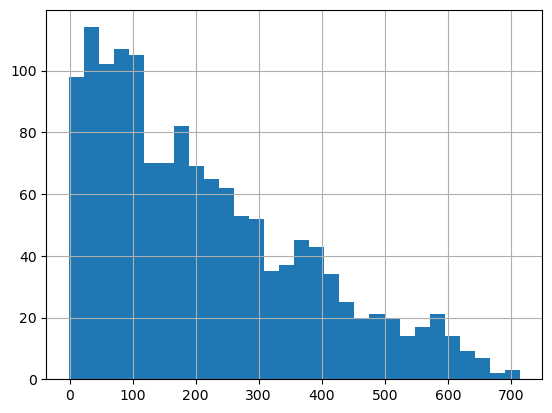

In [18]:
default['days_to_agree'].hist(bins=30)